# Wilt Data Set


##### Source:

Brian Johnson;
Institute for Global Environmental Strategies;
2108-11 Kamiyamaguchi, Hayama, Kanagawa,240-0115 Japan;
Email: Johnson '@' iges.or.jp
#### Data Set Information:

This data set contains some training and testing data from a remote sensing study by Johnson et al. (2013) that involved detecting diseased trees in Quickbird imagery. There are few training samples for the 'diseased trees' class (74) and many for 'other land cover' class (4265).

The data set consists of image segments, generated by segmenting the pansharpened image. The segments contain spectral information from the Quickbird multispectral image bands and texture information from the panchromatic (Pan) image band. The testing data set is for the row with Segmentation scale 15 segments and original multi-spectral image Spectral information in Table 2 of the reference (i.e. row 5).
#### training.csv: training data set (4339 image segments)
#### testing.csv: testing data set (500 image segments)

##### class: 'w' (diseased trees), 'n' (all other land cover)
##### GLCM_Pan: GLCM mean texture (Pan band)
##### Mean_G: Mean green value
##### Mean_R: Mean red value
##### Mean_NIR: Mean NIR value
##### SD_Pan: Standard deviation (Pan band)

#### Importing required libraries : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import *
sns.set_style('darkgrid')

In [2]:
df=pd.read_csv('B:\\Education\\Data Scientist\\EDU_DS\\Data_sets\\Classification\\Wilt Data Set\\wilt_training.csv')
df.head()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,w,120.362774,205.500000,119.395349,416.581395,20.676318
1,w,124.739583,202.800000,115.333333,354.333333,16.707151
2,w,134.691964,199.285714,116.857143,477.857143,22.496712
3,w,127.946309,178.368421,92.368421,278.473684,14.977453
4,w,135.431548,197.000000,112.690476,532.952381,17.604193


In [3]:
df['Class']=df['class']
df.drop(columns='class',axis=1,inplace=True)
df.head()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,Class
0,120.362774,205.500000,119.395349,416.581395,20.676318,w
1,124.739583,202.800000,115.333333,354.333333,16.707151,w
2,134.691964,199.285714,116.857143,477.857143,22.496712,w
3,127.946309,178.368421,92.368421,278.473684,14.977453,w
4,135.431548,197.000000,112.690476,532.952381,17.604193,w


In [4]:
df['Class'].replace(to_replace=['w','n'], value=[1,0],inplace=True)
df.head()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,Class
0,120.362774,205.500000,119.395349,416.581395,20.676318,1
1,124.739583,202.800000,115.333333,354.333333,16.707151,1
2,134.691964,199.285714,116.857143,477.857143,22.496712,1
3,127.946309,178.368421,92.368421,278.473684,14.977453,1
4,135.431548,197.000000,112.690476,532.952381,17.604193,1


In [5]:
df.shape

(4339, 6)

In [6]:
df.corr()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,Class
GLCM_pan,1.000000,-0.122384,-0.107166,-0.094263,-0.065023,0.017804
Mean_Green,-0.122384,1.000000,0.964682,0.223518,0.246103,-0.067359
Mean_Red,-0.107166,0.964682,1.000000,0.121230,0.254383,0.001844
Mean_NIR,-0.094263,0.223518,0.121230,1.000000,0.120276,-0.099268
SD_pan,-0.065023,0.246103,0.254383,0.120276,1.000000,-0.054946
Class,0.017804,-0.067359,0.001844,-0.099268,-0.054946,1.000000


## Data Analyzing:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
GLCM_pan      4339 non-null float64
Mean_Green    4339 non-null float64
Mean_Red      4339 non-null float64
Mean_NIR      4339 non-null float64
SD_pan        4339 non-null float64
Class         4339 non-null int64
dtypes: float64(5), int64(1)
memory usage: 203.5 KB


In [8]:
df.describe()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,Class
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,126.831298,233.906908,117.292439,534.104683,24.924588,0.017055
std,13.735836,60.757687,60.711159,154.495500,11.008303,0.129490
min,0.000000,164.625000,59.142857,86.500000,0.000000,0.000000
25%,118.589080,206.000000,91.975244,422.875000,18.009143,0.000000
50%,127.479167,221.454545,101.727273,528.500000,23.612444,0.000000
75%,135.043591,241.791304,116.866071,643.087037,29.899148,0.000000
max,183.281250,955.714286,746.333333,1005.516129,156.508431,1.000000


In [9]:
df.isnull().sum()

GLCM_pan      0
Mean_Green    0
Mean_Red      0
Mean_NIR      0
SD_pan        0
Class         0
dtype: int64

In [10]:
df.isna().sum()

GLCM_pan      0
Mean_Green    0
Mean_Red      0
Mean_NIR      0
SD_pan        0
Class         0
dtype: int64

In [11]:
pd.DataFrame(df['Class'].value_counts())

,Class
0,4265
1,74


In [12]:
df.duplicated().sum()

14

In [13]:
df.shape

(4339, 6)

##### There is 14 duplicated rows so we should delete them.

In [14]:
df.drop_duplicates(keep=False,inplace=True) 

In [15]:
df.duplicated().sum()

0

In [16]:
pd.DataFrame(df['Class'].value_counts())

,Class
0,4237
1,74


In [17]:
df.shape

(4311, 6)

##### '1' (diseased trees), '0' (all other land cover)

## Plotting and Visualization


In [18]:
GLCM=df.GLCM_pan.values
Green=df.Mean_Green.values
Red=df.Mean_Red.values
NIR=df.Mean_NIR.values
pan=df.SD_pan.values

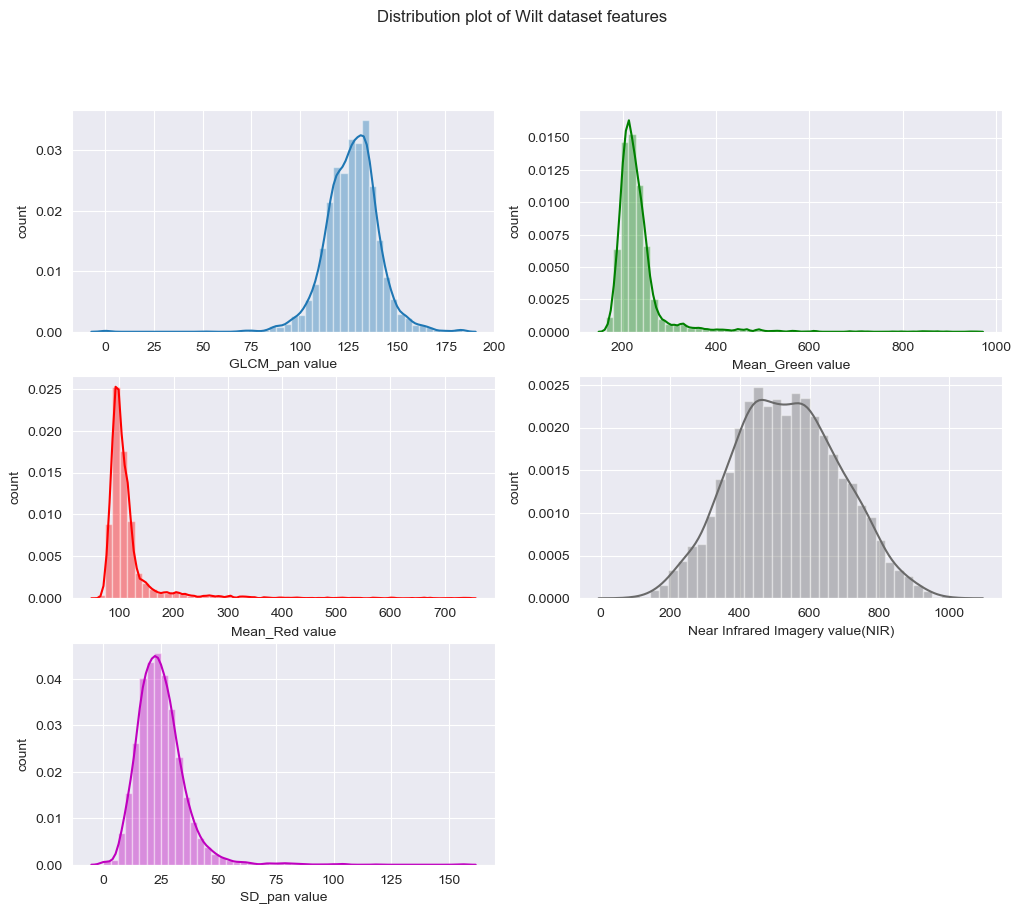

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10),dpi=100)
plt.suptitle('Distribution plot of Wilt dataset features')


plt.subplot(3,2,1)
sns.distplot(GLCM)
plt.xlabel('GLCM_pan value')
plt.ylabel('count')

plt.subplot(3,2,2)
sns.distplot(Green,color='green')
plt.xlabel('Mean_Green value')
plt.ylabel('count')

plt.subplot(3,2,3)
sns.distplot(Red,color='red')
plt.xlabel('Mean_Red value')
plt.ylabel('count')

plt.subplot(3,2,4)
sns.distplot(NIR,color='dimgray')
plt.xlabel('Near Infrared Imagery value(NIR)')
plt.ylabel('count')

plt.subplot(3,2,5)
sns.distplot(pan,color='m')
plt.xlabel('SD_pan value')
plt.ylabel('count');


### log transformation to have a better  distribution

In [20]:
df['Mean_Green_log'] = np.log(df['Mean_Green'])
df['Mean_Red_log'] = np.log(df['Mean_Red'])

#Mean_Red_log=df.Mean_Red.apply(np.log)

#both of them are same

In [21]:
df.shape

(4311, 8)

In [22]:
df.head()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,Class,Mean_Green_log,Mean_Red_log
0,120.362774,205.500000,119.395349,416.581395,20.676318,1,5.325446,4.782440
1,124.739583,202.800000,115.333333,354.333333,16.707151,1,5.312220,4.747826
2,134.691964,199.285714,116.857143,477.857143,22.496712,1,5.294740,4.760952
3,127.946309,178.368421,92.368421,278.473684,14.977453,1,5.183851,4.525785
4,135.431548,197.000000,112.690476,532.952381,17.604193,1,5.283204,4.724645


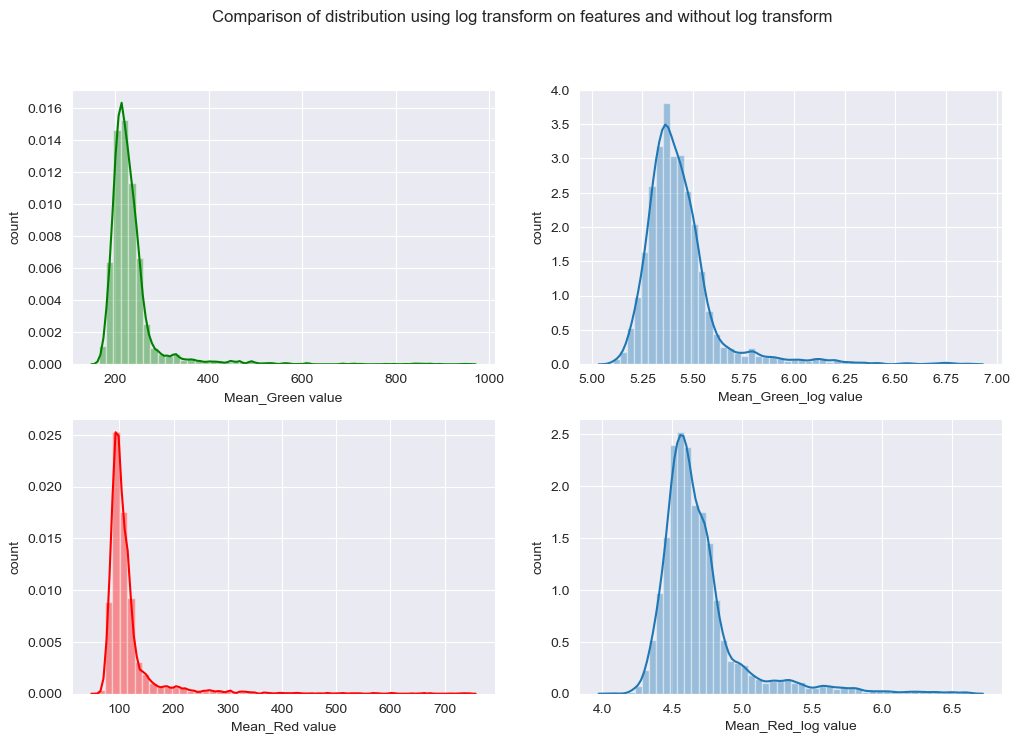

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8),dpi=100)
plt.suptitle('Comparison of distribution using log transform on features and without log transform')

plt.subplot(2,2,1)
sns.distplot(Green,color='green')
plt.xlabel('Mean_Green value')
plt.ylabel('count')

plt.subplot(2,2,2)
sns.distplot( df['Mean_Green_log'])
plt.xlabel('Mean_Green_log value')
plt.ylabel('count')

plt.subplot(2,2,3)
sns.distplot(Red,color='red')
plt.xlabel('Mean_Red value')
plt.ylabel('count')

plt.subplot(2,2,4)
sns.distplot(df['Mean_Red_log'] )
plt.xlabel('Mean_Red_log value')
plt.ylabel('count');

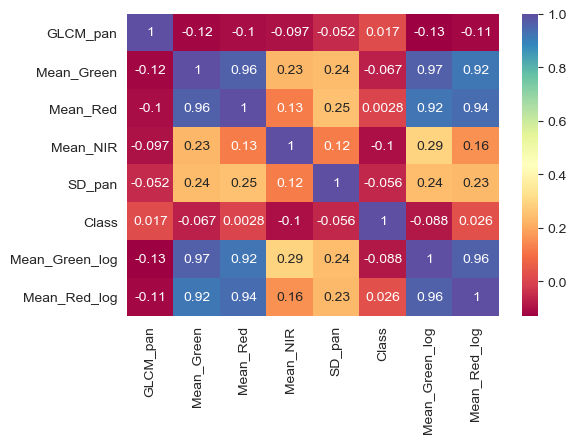

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,4),dpi=100)
sns.heatmap(df.corr(),cmap='Spectral',annot=True);

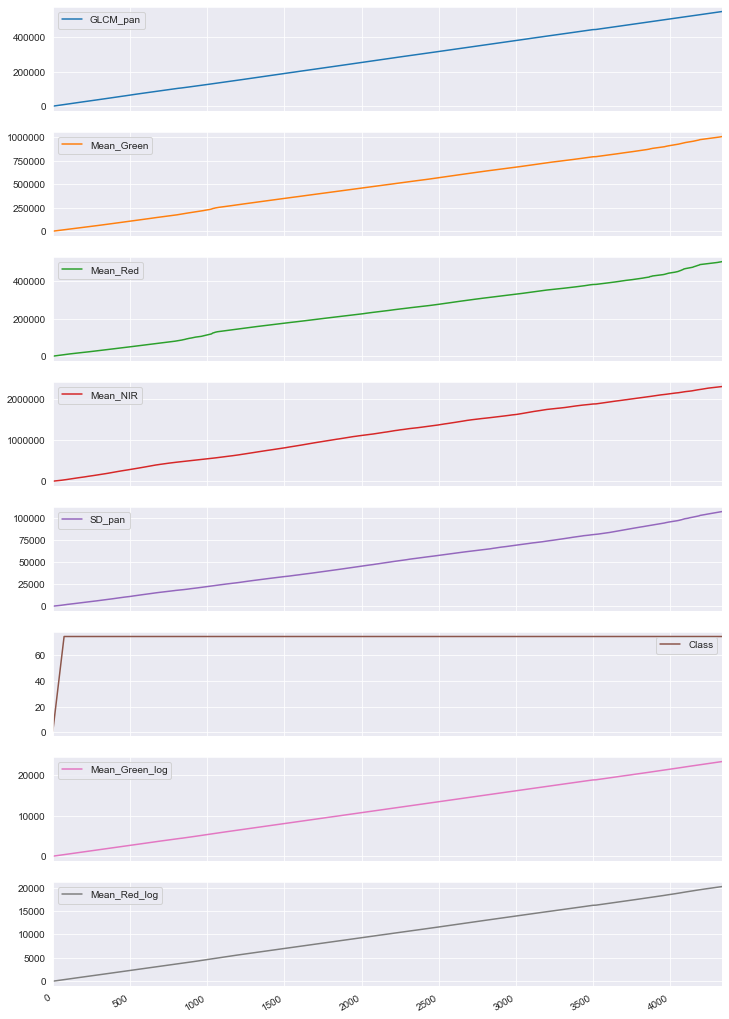

In [25]:
df.cumsum(0).plot(figsize=(12,20),subplots=True)
plt.legend(loc='best');

C:\Users\Ashkan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ashkan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


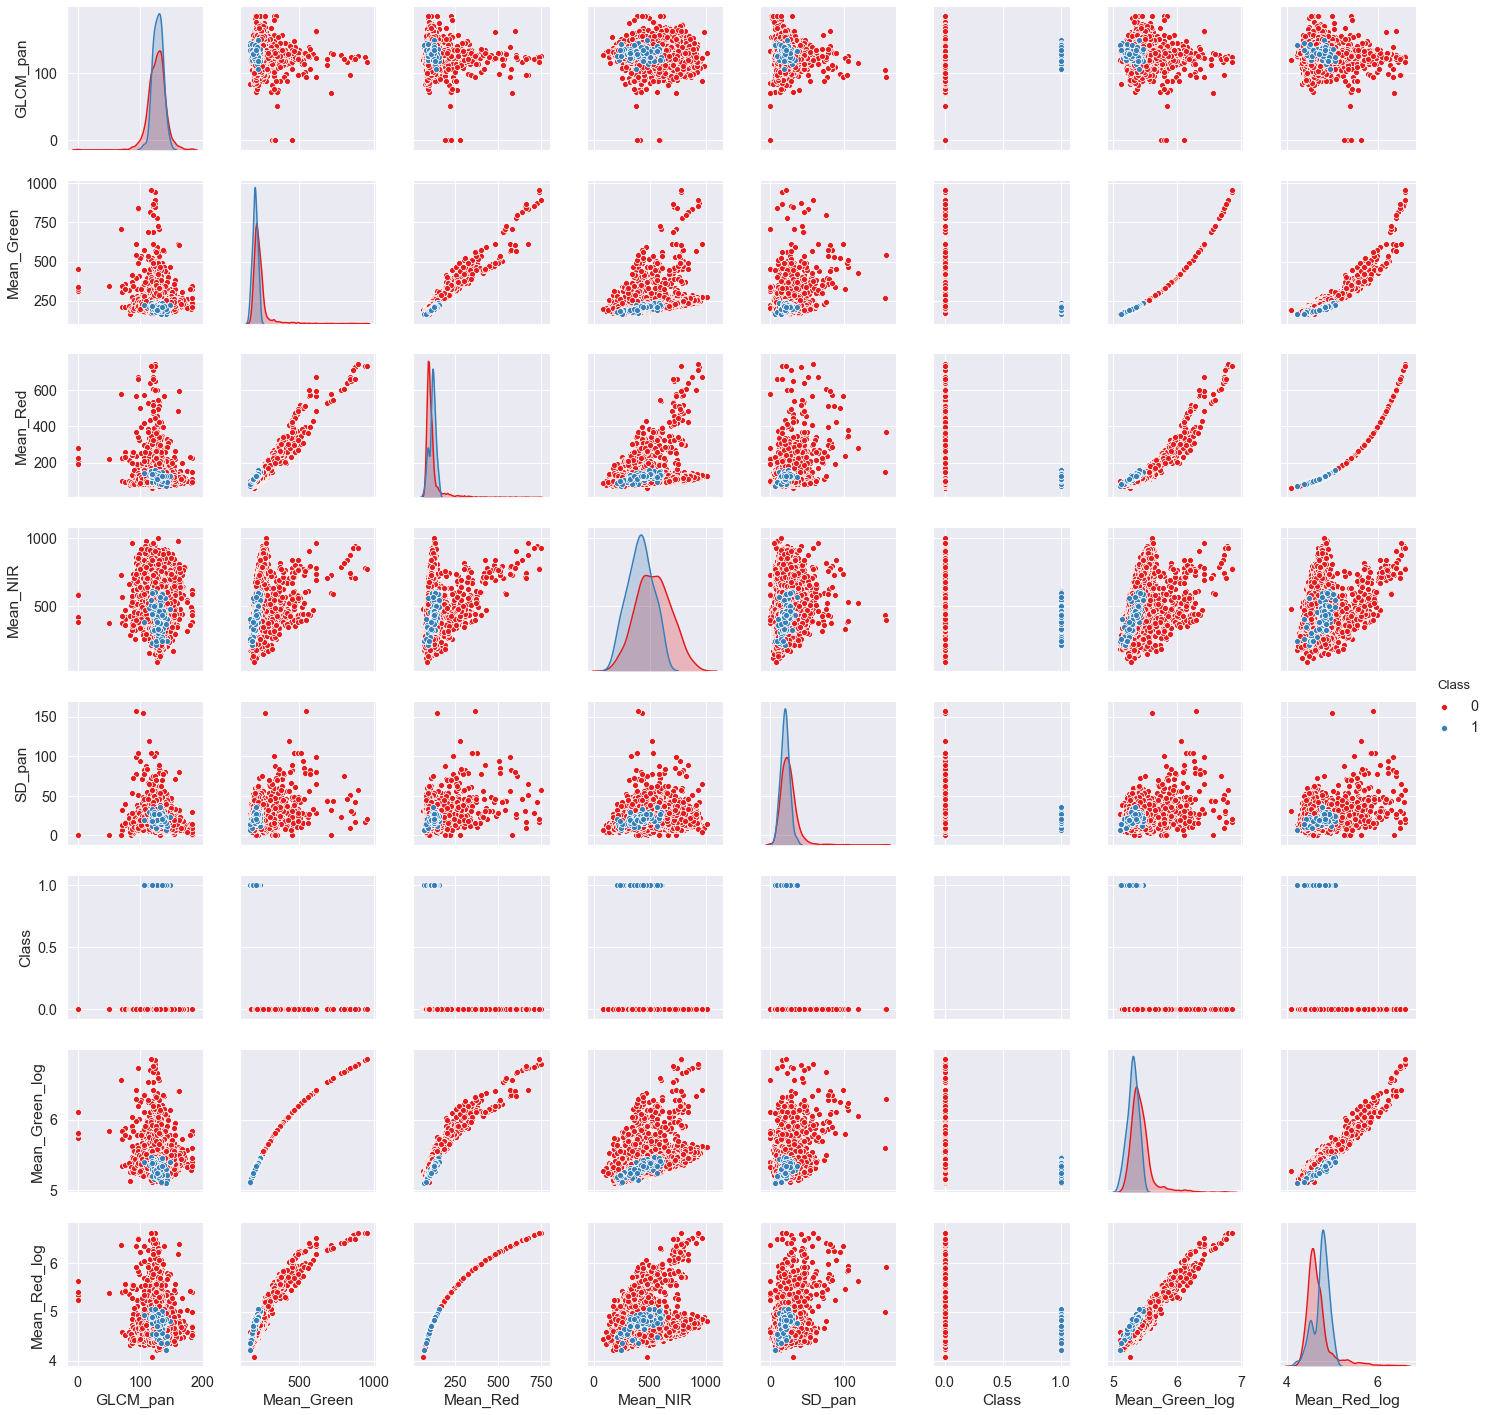

In [26]:
sns.set(font='sans-serif', font_scale=1.3)
sns.pairplot(df,hue='Class',palette="Set1");

##### below plot shows we have more than 4000 class 0 in our data set 

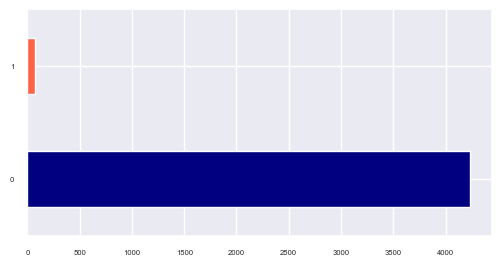

In [27]:
plt.figure(dpi=100)
sns.set(font='sans-serif', font_scale=0.5)
df['Class'].value_counts().plot(kind='barh',figsize=(6,3),color=['navy','tomato']);

### Feature selection

In [28]:
df.head()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,Class,Mean_Green_log,Mean_Red_log
0,120.362774,205.500000,119.395349,416.581395,20.676318,1,5.325446,4.782440
1,124.739583,202.800000,115.333333,354.333333,16.707151,1,5.312220,4.747826
2,134.691964,199.285714,116.857143,477.857143,22.496712,1,5.294740,4.760952
3,127.946309,178.368421,92.368421,278.473684,14.977453,1,5.183851,4.525785
4,135.431548,197.000000,112.690476,532.952381,17.604193,1,5.283204,4.724645


In [29]:
df.drop(['Mean_Green','Mean_Red'],axis=1,inplace=True)
df.head()

,GLCM_pan,Mean_NIR,SD_pan,Class,Mean_Green_log,Mean_Red_log
0,120.362774,416.581395,20.676318,1,5.325446,4.782440
1,124.739583,354.333333,16.707151,1,5.312220,4.747826
2,134.691964,477.857143,22.496712,1,5.294740,4.760952
3,127.946309,278.473684,14.977453,1,5.183851,4.525785
4,135.431548,532.952381,17.604193,1,5.283204,4.724645


In [30]:
X=df[['GLCM_pan','Mean_NIR','SD_pan','Mean_Green_log','Mean_Red_log']]
Y=df['Class'].values

In [31]:
X.shape,Y.shape

((4311, 5), (4311,))

### Normalize Data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
X= StandardScaler().fit(X).transform(X)
X_norm=pd.DataFrame(X)
X_norm.head()

,0,1,2,3,4
0,-0.475180,-0.764405,-0.388399,-0.575692,0.278598
1,-0.156213,-1.166831,-0.756342,-0.646968,0.166728
2,0.569083,-0.368266,-0.219648,-0.741174,0.209150
3,0.077483,-1.657253,-0.916686,-1.338769,-0.550893
4,0.622982,-0.012082,-0.673186,-0.803342,0.091807


In [34]:
X_norm.mean(),X_norm.std()

(0    4.832825e-16
 1    5.165331e-16
 2   -1.643315e-16
 3   -4.499610e-16
 4   -8.648975e-16
 dtype: float64, 0    1.000116
 1    1.000116
 2    1.000116
 3    1.000116
 4    1.000116
 dtype: float64)

## Classification

### K Nearest Neighbor(KNN):

In [35]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split( X_norm, Y, test_size=0.3, random_state=0)
print ('Train set:', xtrain.shape,  ytrain.shape)
print ('Test set:', xtest.shape,  ytest.shape)

Train set: (3017, 5) (3017,)
Test set: (1294, 5) (1294,)


In [36]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(xtrain,ytrain)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
yhat = neigh.predict(xtest)
yhat[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(ytrain, neigh.predict(xtrain)))
print("Test set Accuracy: ", metrics.accuracy_score(ytest, neigh.predict(xtest)))

Train set Accuracy:  0.9933708982432881
Test set Accuracy:  0.9899536321483772


### Find the best K :

In [39]:
#def find_k(Ks):
Ks=25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
    
for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xtrain,ytrain)
    yhat=neigh.predict(xtest)
        
    mean_acc[n-1] = metrics.accuracy_score(ytest, yhat)
    std_acc[n-1]=np.std(yhat==ytest)/np.sqrt(yhat.shape[0])
        
print("mean_acc are :",'\n' ,mean_acc,'\n',"std_acc are :",'\n' ,std_acc)

    

mean_acc are : 
 [0.98840804 0.98995363 0.99149923 0.98995363 0.98995363 0.98763524
 0.98918083 0.98686244 0.98686244 0.98454405 0.98454405 0.98454405
 0.98454405 0.98454405 0.98454405 0.98299845 0.98377125 0.98222566
 0.98222566 0.98145286 0.98145286 0.98145286 0.98145286 0.98145286] 
 std_acc are : 
 [0.00297563 0.00277233 0.00255216 0.00277233 0.00277233 0.00307202
 0.00287586 0.00316533 0.00316533 0.00342924 0.00342924 0.00342924
 0.00342924 0.00342924 0.00342924 0.0035938  0.00351255 0.00367312
 0.00367312 0.00375065 0.00375065 0.00375065 0.00375065 0.00375065]


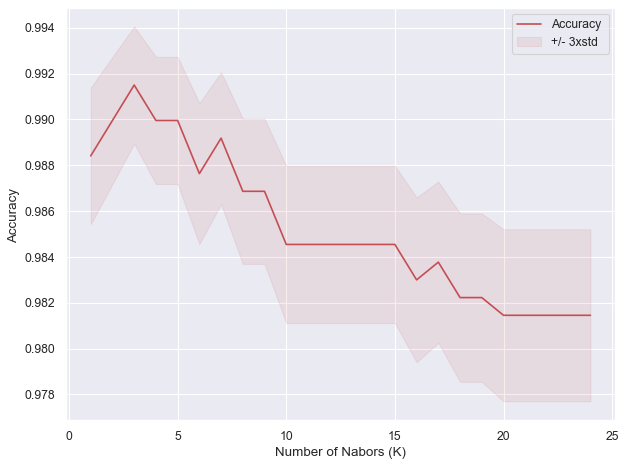

In [40]:
sns.set(font='sans-serif', font_scale=1)
plt.figure(figsize=(8,6),dpi=80)
plt.plot(range(1,Ks),mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10,color='r')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [41]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.991499227202473 with k= 3


# KNN MODEL :

In [198]:
k = 3
knn = KNeighborsClassifier(n_neighbors = k).fit(xtrain,ytrain)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# Model Evaluation using Test set

In [199]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [200]:
test_df = pd.read_csv('B:\\Education\\Data Scientist\\EDU_DS\\Data_sets\\Classification\\Wilt Data Set\\wilt_testing.csv')
test_df.head()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,n,109.828571,183.700000,82.950000,251.750000,16.079412
1,n,130.284483,212.637931,96.896552,482.396552,21.210295
2,n,131.386555,185.466667,85.466667,419.666667,13.339998
3,n,141.345098,180.875000,81.500000,348.062500,18.213577
4,w,121.383408,218.357143,112.017857,426.607143,19.083196


In [201]:
test_df['class'].replace(to_replace=['w','n'], value=[1,0],inplace=True)
test_df.head()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,0,109.828571,183.700000,82.950000,251.750000,16.079412
1,0,130.284483,212.637931,96.896552,482.396552,21.210295
2,0,131.386555,185.466667,85.466667,419.666667,13.339998
3,0,141.345098,180.875000,81.500000,348.062500,18.213577
4,1,121.383408,218.357143,112.017857,426.607143,19.083196


In [202]:
test_df.shape

(500, 6)

In [203]:
test_df['class'].value_counts()

0    313
1    187
Name: class, dtype: int64

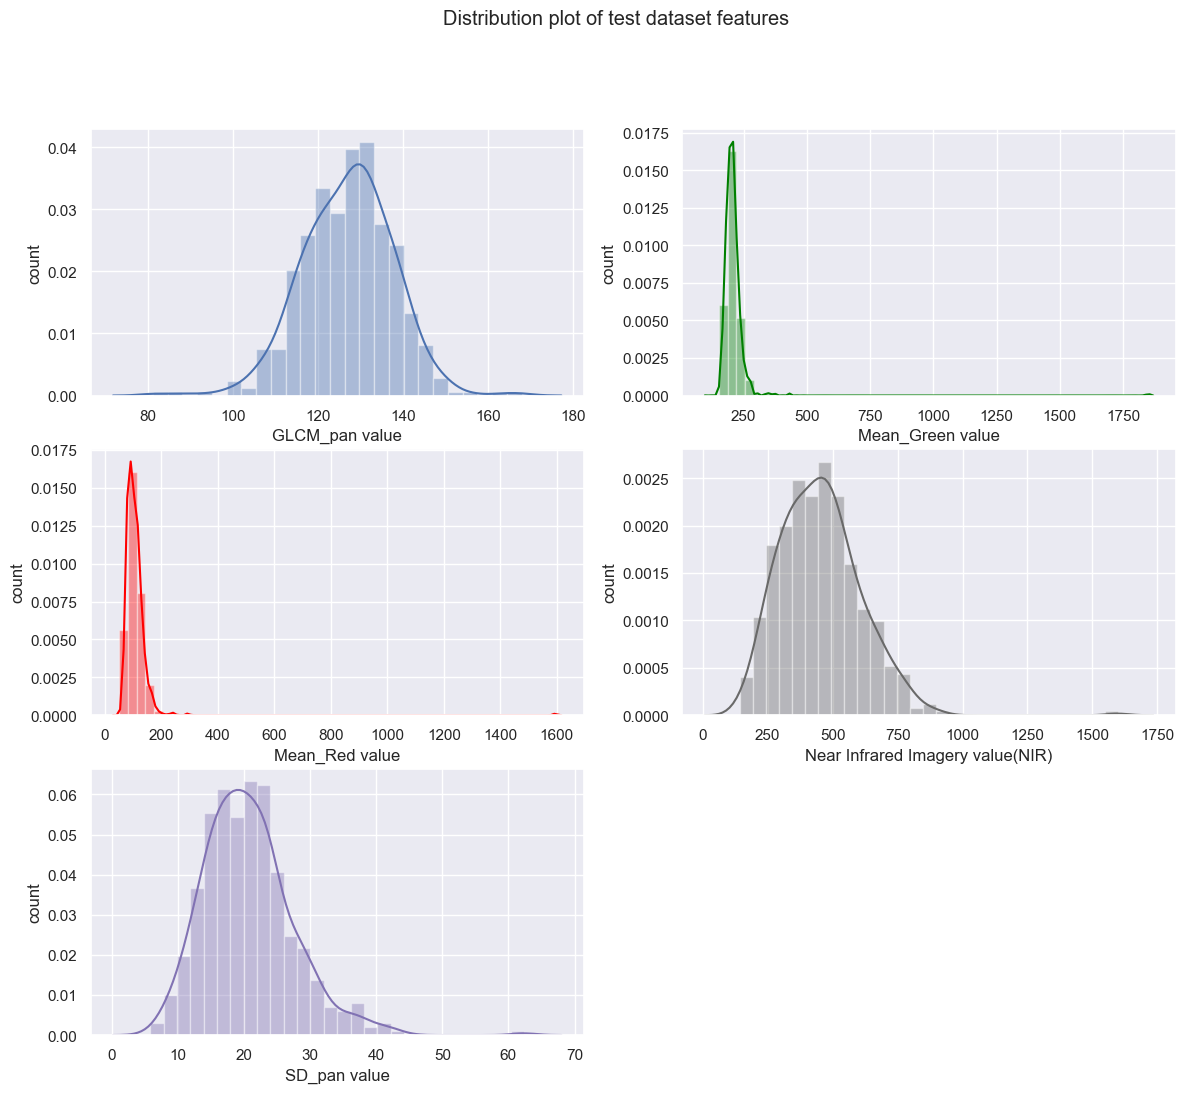

In [204]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,12),dpi=100)
plt.suptitle('Distribution plot of test dataset features')


plt.subplot(3,2,1)
sns.distplot(test_df['GLCM_pan'])
plt.xlabel('GLCM_pan value')
plt.ylabel('count')

plt.subplot(3,2,2)
sns.distplot(test_df['Mean_Green'],color='green')
plt.xlabel('Mean_Green value')
plt.ylabel('count')

plt.subplot(3,2,3)
sns.distplot(test_df['Mean_Red'],color='red')
plt.xlabel('Mean_Red value')
plt.ylabel('count')

plt.subplot(3,2,4)
sns.distplot(test_df['Mean_NIR'],color='dimgray')
plt.xlabel('Near Infrared Imagery value(NIR)')
plt.ylabel('count')

plt.subplot(3,2,5)
sns.distplot(test_df['SD_pan'],color='m')
plt.xlabel('SD_pan value')
plt.ylabel('count');

In [205]:
test_df['Mean_Green_log'] = np.log(test_df['Mean_Green'])
test_df['Mean_Red_log'] = np.log(test_df['Mean_Red'])


In [206]:
test_df.head()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,Mean_Green_log,Mean_Red_log
0,0,109.828571,183.700000,82.950000,251.750000,16.079412,5.213304,4.418238
1,0,130.284483,212.637931,96.896552,482.396552,21.210295,5.359591,4.573644
2,0,131.386555,185.466667,85.466667,419.666667,13.339998,5.222875,4.448126
3,0,141.345098,180.875000,81.500000,348.062500,18.213577,5.197806,4.400603
4,1,121.383408,218.357143,112.017857,426.607143,19.083196,5.386132,4.718658


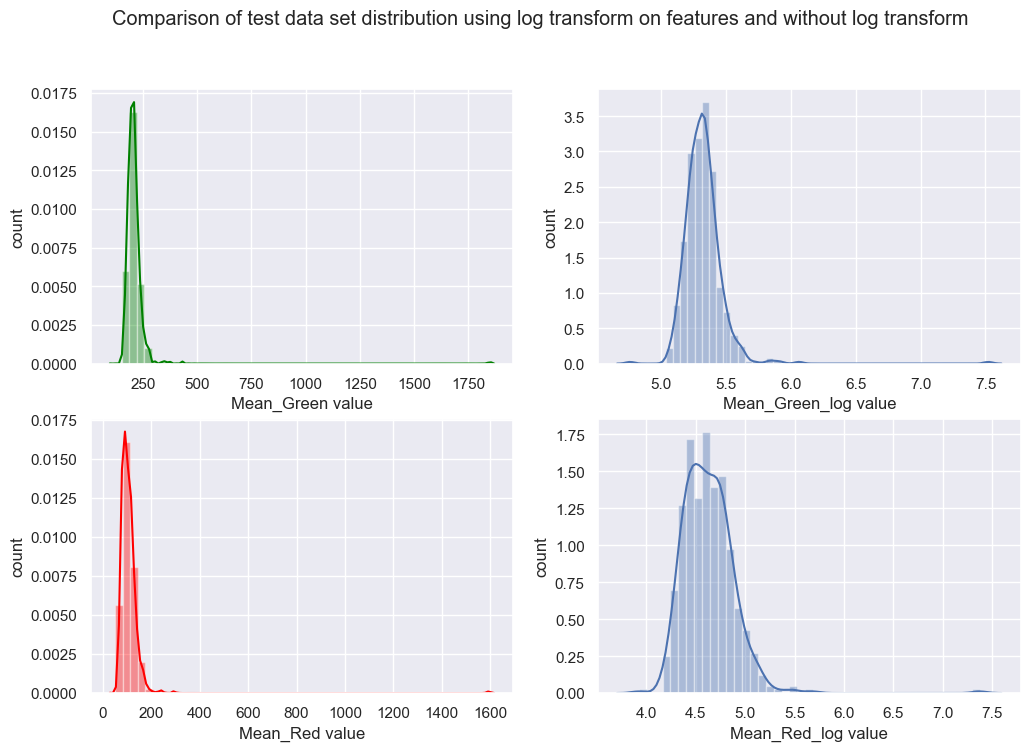

In [207]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8),dpi=100)
plt.suptitle('Comparison of test data set distribution using log transform on features and without log transform')

plt.subplot(2,2,1)
sns.distplot(test_df['Mean_Green'],color='green')
plt.xlabel('Mean_Green value')
plt.ylabel('count')

plt.subplot(2,2,2)
sns.distplot( test_df['Mean_Green_log'])
plt.xlabel('Mean_Green_log value')
plt.ylabel('count')

plt.subplot(2,2,3)
sns.distplot(test_df['Mean_Red'],color='red')
plt.xlabel('Mean_Red value')
plt.ylabel('count')

plt.subplot(2,2,4)
sns.distplot(test_df['Mean_Red_log'] )
plt.xlabel('Mean_Red_log value')
plt.ylabel('count');

In [208]:
test_df.drop(['Mean_Green','Mean_Red'],axis=1,inplace=True)
test_df.head()

,class,GLCM_pan,Mean_NIR,SD_pan,Mean_Green_log,Mean_Red_log
0,0,109.828571,251.750000,16.079412,5.213304,4.418238
1,0,130.284483,482.396552,21.210295,5.359591,4.573644
2,0,131.386555,419.666667,13.339998,5.222875,4.448126
3,0,141.345098,348.062500,18.213577,5.197806,4.400603
4,1,121.383408,426.607143,19.083196,5.386132,4.718658


In [209]:
X_test=test_df[['GLCM_pan','Mean_Green_log','Mean_Red_log','Mean_NIR','SD_pan']]
Y_test=test_df['class'].values

In [210]:
# normalizing 

In [211]:
X_test= StandardScaler().fit(X_test).transform(X_test)
X_test_norm=pd.DataFrame(X_test)
X_test_norm.head()

,0,1,2,3,4
0,-1.617492,-0.709051,-0.805318,-1.294426,-0.675777
1,0.302012,0.208461,-0.211652,0.183679,0.084290
2,0.405427,-0.649020,-0.691142,-0.218327,-1.081583
3,1.339898,-0.806253,-0.872686,-0.677204,-0.359631
4,-0.533231,0.374928,0.342317,-0.173849,-0.230809


## Testing the Model 

In [212]:
knn_yhat = knn.predict(X_test_norm)
knn_f1 = f1_score(Y_test, knn_yhat, average='weighted') 
knn_jsc = jaccard_similarity_score(Y_test, knn_yhat)
print('f1 score: ',knn_f1)
print('Jaccard index: ',knn_jsc)

f1 score:  0.5041296296296297
Jaccard index:  0.608


C:\Users\Ashkan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [213]:
Jaccard = [knn_jsc]
F1_score = [knn_f1]

dframe = {'Algorithm': ['KNN'], \
     'Jaccard': Jaccard, 'F1-score': F1_score}

Report = pd.DataFrame(data=dframe, columns=['Algorithm', 'Jaccard', 'F1-score'], index=None)
Report

,Algorithm,Jaccard,F1-score
0,KNN,0.608,0.50413


In [214]:
confusion = metrics.confusion_matrix(Y_test, knn_yhat)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[294  19]
 [177  10]]


In [215]:
pd.DataFrame(data=confusion,columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])

,Predicted 0,Predicted 1
Actual 0,294,19
Actual 1,177,10


In [216]:
n_total=TP+TN+FP+FN
n_total

500

In [217]:
285+28

313

#### True Positives (TP): we correctly predicted that they are Class 1
#### True Negatives (TN): we correctly predicted that they don't Class 1
#### False Positives (FP): we incorrectly predicted that they are Class 1 (a "Type I error")
#### False Negatives (FN): we incorrectly predicted that they don't Class 1 (a "Type II error")

In [218]:
True_pred,wrong_pred=TP+TN,FN+FP
TPred=(True_pred*100)/500
FPred=(wrong_pred*100)/500
print('The model predict has','\t',TPred,'%,True prediction')
print('The model predict has','\t',FPred,'%,False prediction')

The model predict has 	 60.8 %,True prediction
The model predict has 	 39.2 %,False prediction


In [219]:
print('True', Y_test[0:30])
print('Pred', knn_yhat[0:30])

True [0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0]
Pred [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [224]:
df.head()

,GLCM_pan,Mean_NIR,SD_pan,Class,Mean_Green_log,Mean_Red_log
0,120.362774,416.581395,20.676318,1,5.325446,4.782440
1,124.739583,354.333333,16.707151,1,5.312220,4.747826
2,134.691964,477.857143,22.496712,1,5.294740,4.760952
3,127.946309,278.473684,14.977453,1,5.183851,4.525785
4,135.431548,532.952381,17.604193,1,5.283204,4.724645


In [225]:
test_df.head()

,class,GLCM_pan,Mean_NIR,SD_pan,Mean_Green_log,Mean_Red_log
0,0,109.828571,251.750000,16.079412,5.213304,4.418238
1,0,130.284483,482.396552,21.210295,5.359591,4.573644
2,0,131.386555,419.666667,13.339998,5.222875,4.448126
3,0,141.345098,348.062500,18.213577,5.197806,4.400603
4,1,121.383408,426.607143,19.083196,5.386132,4.718658


In [231]:
df.to_csv(r'wilt_traindt.csv')
test_df.to_csv(r'wilt_testdt.csv')